### Carga de librerias necesarias para el analisis multivariante

In [86]:

#==============================================================================
# EJEMPLO DEL MÉTODO DE REGRESIÓN LINEAL SIMPLE USANDO LAS LIBRERÍAS 
# SKLEARN Y STATSMODELS (EJEMPLO 1)
#==============================================================================

# Cargar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

### Se carga el dataset 
# Heart Disease UCI 


### Este es un dataset **multivariante** clásico utilizado en Machine Learning para predecir la **presencia o ausencia de enfermedad cardíaca** en pacientes. Aunque la base de datos original contiene 76 atributos, la mayoría de los estudios y análisis se centran en un subconjunto de 14 variables clave, que son las que se utilizarán en este análisis. El objetivo principal es construir un modelo predictivo basado en estas 14 características clínicas. 🧐


## 🩺 Descripción de Variables: Heart Disease UCI

| Variable     | Tipo             | Descripción                                                          | Valores / Ejemplo                                                                 |
| :----------- | :--------------- | :------------------------------------------------------------------- | :-------------------------------------------------------------------------------- |
| **id** | Numérica         | 🆔 Identificador único para cada paciente.                           | 1, 2, ...                                                                         |
| **age** | Numérica         | ⏳ Contador de millas de vida del paciente (en años).                  | 63, 37, ...                                                                       |
| **origin** | Categórica       | 📍 Lugar donde comenzó el viaje de los datos del paciente.           | Cleveland, Hungary, ...                                                           |
| **sex** | Categórica Binaria | 🧬 Plano biológico del paciente.                                     | 1 = Hombre, 0 = Mujer                                                             |
| **cp** | Categórica       | ❤️‍🩹 Señal SOS del corazón (tipo de dolor torácico).                   | 0: Angina típica<br>1: Angina atípica<br>2: Dolor no anginoso<br>3: Asintomático |
| **trestbps** | Numérica         | 🌡️ Lectura de la olla a presión (presión arterial en reposo en mmHg). | 145, 130, ...                                                                     |
| **chol** | Numérica         | 🧈 El "factor grasa" en el torrente sanguíneo (colesterol en mg/dl).  | 233, 250, ...                                                                     |
| **fbs** | Categórica Binaria | 🍬 Verificación del nivel de azúcar matutino (> 120 mg/dl?).         | 1 = Verdadero<br>0 = Falso                                                        |
| **restecg** | Categórica       | ⚡ Instantánea del ritmo eléctrico del corazón en reposo.             | 0: Normal<br>1: Anormalidad ST-T<br>2: Hipertrofia VI                           |
| **thalach** | Numérica         | 🏃‍♀️ La velocidad máxima alcanzada por el corazón durante el ejercicio. | 150, 187, ...                                                                     |
| **exang** | Categórica Binaria | 😥 ¿El ejercicio hizo protestar al corazón? (Angina inducida).       | 1 = Sí<br>0 = No                                                                  |
| **oldpeak** | Numérica         | 📉 La huella eléctrica dejada por el ejercicio en el segmento ST.    | 2.3, 3.5, ...                                                                     |
| **slope** | Categórica       | 📈 La inclinación de la onda de recuperación del corazón post-ejercicio. | 0, 1, 2                                                                           |
| **ca** | Numérica         | 🚦 Chequeo de tráfico en las autopistas coronarias (nº vasos principales). | 0, 1, 2, 3                                                                        |
| **thal** | Categórica       | 🩸 Reporte de condición del flujo sanguíneo (Talasemia).             | 1: Normal<br>2: Defecto fijo<br>3: Defecto reversible                             |
| **num/target**| Categórica Binaria | 🎯 El diagnóstico final. ¿Hay enfermedad cardíaca?                  | 0 = No<br>1 = Sí                                                                  |

### Carga el DataSet

In [87]:
df = pd.read_csv('./heart_disease_uci.csv') # Cargar dataset
df = df.drop(['id', 'dataset'], axis=1)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [88]:
# Manejar valores faltantes representados como '?' en 'ca' y 'thal'
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Imputar con la moda (la categoría más frecuente)
ca_mode = df['ca'].mode()[0]
thal_mode = df['thal'].mode()[0]
df['ca'] = df['ca'].fillna(ca_mode)
df['thal'] = df['thal'].fillna(thal_mode)

# Asegurarse de que 'ca' sea numérica después de la imputación
df['ca'] = pd.to_numeric(df['ca'])

print("\nDataset después de limpieza inicial (manejo de '?'):")
print(df.head())
print("\nTipos de datos después de limpieza:")
print(df.info())


Dataset después de limpieza inicial (manejo de '?'):
   age     sex               cp  trestbps   chol    fbs         restecg  \
0   63    Male   typical angina     145.0  233.0   True  lv hypertrophy   
1   67    Male     asymptomatic     160.0  286.0  False  lv hypertrophy   
2   67    Male     asymptomatic     120.0  229.0  False  lv hypertrophy   
3   37    Male      non-anginal     130.0  250.0  False          normal   
4   41  Female  atypical angina     130.0  204.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  
0   150.0  False      2.3  downsloping  0.0       fixed defect    0  
1   108.0   True      1.5         flat  3.0             normal    2  
2   129.0   True      2.6         flat  2.0  reversable defect    1  
3   187.0  False      3.5  downsloping  0.0             normal    0  
4   172.0  False      1.4    upsloping  0.0             normal    0  

Tipos de datos después de limpieza:
<class 'pandas.core.frame.DataFrame'>


In [89]:
# a) Variables Binarias (Nominal) -> Label Encoding / map()
binary_cols = ['sex', 'fbs', 'exang']
# Usaremos map para mayor claridad, pero LabelEncoder también funciona
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['fbs'] = df['fbs'].map({True: 1, False: 0}) # Asumiendo que fbs está como Booleano o String 'True'/'False'
df['exang'] = df['exang'].map({True: 1, False: 0}) # Asumiendo que exang está como Booleano o String 'True'/'False'

# b) Variable Ordinal -> Ordinal Encoding
# Definir el orden correcto de las categorías
slope_mode = df['slope'].mode()[0]  # Obtener el valor más frecuente
df['slope'] = df['slope'].fillna(slope_mode)  # Imputar NaN con el valor más frecuente

# Definir el orden correcto de las categorías
slope_order = ['upsloping', 'flat', 'downsloping'] 
ordinal_encoder = OrdinalEncoder(categories=[slope_order])
# Aplicar OrdinalEncoder a la columna 'slope'
# Usamos reshape(-1, 1) porque el encoder espera un array 2D
df['slope'] = ordinal_encoder.fit_transform(df[['slope']])

# c) Variables Nominales (Multiclase) -> One-Hot Encoding
nominal_cols = ['cp', 'restecg', 'thal']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# d) Variable Objetivo -> Binaria (0 o 1)
# Convertir 'num' a binario: 0 si es 0, 1 si es mayor que 0
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('num', axis=1) # Eliminar la columna original 'num'


numeric_cols_with_nan = ['trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak'] 

print("\nImputando valores nulos en columnas numéricas usando la mediana...")
for col in numeric_cols_with_nan:
    # Calcular la mediana IGNORANDO los NaN existentes
    median_val = df[col].median() 
    # Rellenar los NaN con la mediana calculada
    df[col] = df[col].fillna(median_val)
    print(f"  Valores nulos en '{col}' rellenados con la mediana: {median_val}")


Imputando valores nulos en columnas numéricas usando la mediana...
  Valores nulos en 'trestbps' rellenados con la mediana: 130.0
  Valores nulos en 'chol' rellenados con la mediana: 223.0
  Valores nulos en 'fbs' rellenados con la mediana: 0.0
  Valores nulos en 'thalch' rellenados con la mediana: 140.0
  Valores nulos en 'exang' rellenados con la mediana: 0.0
  Valores nulos en 'oldpeak' rellenados con la mediana: 0.5


In [90]:
# --- 4. Verificación Final ---
print("\nVisualización del DataFrame después de TODAS las transformaciones:")
print(df.head())

# Verificación de valores nulos (NaN)
print("\nValores nulos en el dataset después de la transformación:")
# Convertimos los tipos bool a int para poder usar isnull().sum() sin problemas
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
print(df.isnull().sum())

print("\nTipos de datos finales:")
print(df.info())


Visualización del DataFrame después de TODAS las transformaciones:
   age  sex  trestbps   chol  fbs  thalch  exang  oldpeak  slope   ca  \
0   63    1     145.0  233.0  1.0   150.0    0.0      2.3    2.0  0.0   
1   67    1     160.0  286.0  0.0   108.0    1.0      1.5    1.0  3.0   
2   67    1     120.0  229.0  0.0   129.0    1.0      2.6    1.0  2.0   
3   37    1     130.0  250.0  0.0   187.0    0.0      3.5    2.0  0.0   
4   41    0     130.0  204.0  0.0   172.0    0.0      1.4    0.0  0.0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1               False           False              False           False   
2               False           False              False           False   
3               False            True              False            True   
4                True           False              False           False   

   restecg_st-t abnormality  thal_no

### Segmenta las variables independientes (X) y la variable dependiente (y)

In [91]:
# Define las características (X) eliminando la columna objetivo
X = df.drop('target', axis=1) 
# Define la variable objetivo (y)
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Se usa stratify=y para mantener la proporción de clases en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) 

print(f"\nForma de X_train: {X_train.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Distribución de clases en y_train:\n{y_train.value_counts(normalize=True)}")
print(f"Distribución de clases en y_test:\n{y_test.value_counts(normalize=True)}")


Forma de X_train: (644, 17)
Forma de X_test: (276, 17)
Distribución de clases en y_train:
target
1    0.552795
0    0.447205
Name: proportion, dtype: float64
Distribución de clases en y_test:
target
1    0.554348
0    0.445652
Name: proportion, dtype: float64


### Escalar variables

In [92]:
# Escalar las características numéricas mejora el rendimiento de la Regresión Logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Usar solo transform en el conjunto de test

 ### Modelo de Regresión Logística

In [93]:
class_reports = {}
model_metrics = []

# --- Logistic Regression ---
print("-" * 30)
print("Optimizando y Entrenando Regresión Logística...")
# Define parameters for GridSearchCV
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), lr_params, cv=5, scoring='f1_weighted', n_jobs=-1)
lr_grid.fit(X_train, y_train)
model_lr = lr_grid.best_estimator_

y_pred_lr = model_lr.predict(X_test)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("\nRegresión Logística optimizada:")
print(f"  Mejores Parámetros: {lr_grid.best_params_}")
print(classification_report(y_test, y_pred_lr))
class_reports['Logistic Regression'] = report_lr
model_metrics.append({'Model': 'Logistic Regression',
                      'Accuracy': accuracy_lr,
                      'Precision (w)': report_lr['weighted avg']['precision'],
                      'Recall (w)': report_lr['weighted avg']['recall'],
                      'F1-Score (w)': report_lr['weighted avg']['f1-score']})

------------------------------
Optimizando y Entrenando Regresión Logística...

Regresión Logística optimizada:
  Mejores Parámetros: {'C': 1, 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       123
           1       0.85      0.84      0.84       153

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



 ### Modelo de Random Forest Classifier


In [94]:
print("-" * 30)
print("Optimizando y Entrenando Random Forest Classifier...")
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None], # Reduced options for speed
    'min_samples_leaf': [1, 3, 5]
}
# Use 'f1_weighted' as scoring for imbalanced datasets potentially
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), rf_params, cv=3, scoring='f1_weighted', verbose=1)
rf_grid.fit(X_train, y_train)
model_rf = rf_grid.best_estimator_

y_pred_rf = model_rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest optimizado:")
print(f"  Mejores Parámetros: {rf_grid.best_params_}")
print(classification_report(y_test, y_pred_rf))
class_reports['Random Forest'] = report_rf
model_metrics.append({'Model': 'Random Forest',
                      'Accuracy': accuracy_rf,
                      'Precision (w)': report_rf['weighted avg']['precision'],
                      'Recall (w)': report_rf['weighted avg']['recall'],
                      'F1-Score (w)': report_rf['weighted avg']['f1-score']})

------------------------------
Optimizando y Entrenando Random Forest Classifier...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Random Forest optimizado:
  Mejores Parámetros: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       123
           1       0.84      0.85      0.84       153

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



 ### Modelo de XGBoost Classifier

In [95]:
# --- XGBoost Classifier ---
print("-" * 30)
print("Optimizando y Entrenando XGBoost Classifier...")
xgb_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
# Elimina 'use_label_encoder=False' de la definición del clasificador
xgb_grid = GridSearchCV(XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1, eval_metric='logloss'), # <-- Parámetro eliminado
                        xgb_params, cv=3, scoring='f1_weighted', verbose=1)
xgb_grid.fit(X_train, y_train) # Asume que y_train ya es numérico (0/1)
model_xgb = xgb_grid.best_estimator_

y_pred_xgb = model_xgb.predict(X_test)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print("\nXGBoost optimizado:")
print(f"  Mejores Parámetros: {xgb_grid.best_params_}")
print(classification_report(y_test, y_pred_xgb))
class_reports['XGBoost'] = report_xgb
model_metrics.append({'Model': 'XGBoost',
                      'Accuracy': accuracy_xgb,
                      'Precision (w)': report_xgb['weighted avg']['precision'],
                      'Recall (w)': report_xgb['weighted avg']['recall'],
                      'F1-Score (w)': report_xgb['weighted avg']['f1-score']})
print("-" * 30)

------------------------------
Optimizando y Entrenando XGBoost Classifier...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

XGBoost optimizado:
  Mejores Parámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.84      0.84      0.84       153

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276

------------------------------


#  --- Comparación de Modelos ---


In [96]:
# Convertir la lista de métricas a DataFrame
models_df = pd.DataFrame(model_metrics)

print("\nTabla Comparativa de Métricas Agregadas:")
print(models_df.to_string())

# Visualización usando Plotly

# Gráfico de Barras para Accuracy
fig_acc = px.bar(models_df.sort_values('Accuracy', ascending=False),
                 x='Model', y='Accuracy', color='Model',
                 template='plotly_dark', title='Comparación de Accuracy por Modelo',
                 text='Accuracy',
                 labels={'Accuracy': 'Accuracy Score', 'Model': 'Modelo'})
fig_acc.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_acc.update_layout(xaxis={'categoryorder':'total descending'})
fig_acc.show()

# Gráfico de Barras para F1-Score (Weighted)
fig_f1 = px.bar(models_df.sort_values('F1-Score (w)', ascending=False),
                x='Model', y='F1-Score (w)', color='Model',
                template='plotly_dark', title='Comparación de F1-Score (Weighted) por Modelo',
                text='F1-Score (w)',
                labels={'F1-Score (w)': 'F1-Score (Weighted Avg)', 'Model': 'Modelo'})
fig_f1.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig_f1.update_layout(xaxis={'categoryorder':'total descending'})
fig_f1.show()

# Opcional: Visualizar Precision y Recall si es relevante
fig_pr = px.bar(models_df, x='Model', y=['Precision (w)', 'Recall (w)'],
             barmode='group', template='plotly_dark',
             title='Comparación de Precision y Recall (Weighted) por Modelo',
             labels={'value': 'Score', 'variable': 'Métrica', 'Model': 'Modelo'})
fig_pr.show()


Tabla Comparativa de Métricas Agregadas:
                 Model  Accuracy  Precision (w)  Recall (w)  F1-Score (w)
0  Logistic Regression  0.826087       0.826432    0.826087      0.826216
1        Random Forest  0.826087       0.825878    0.826087      0.825939
2              XGBoost  0.822464       0.822339    0.822464      0.822391


In [97]:
# Añadir una constante (intercepto) a las variables predictoras
X = sm.add_constant(X)

# Dividir datos (opcional para statsmodels, pero bueno para consistencia)
# Si lo haces, asegúrate de escalar DESPUÉS de dividir
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # Usar stratify

# Escalar características (¡Importante ajustar solo en train!)
# Nota: Statsmodels no requiere escalado, pero lo haremos por consistencia con sklearn
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'] # Columnas a escalar (excluye dummies y constantes)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


# --- Ajustar Modelo Logístico con statsmodels ---
# Usamos los datos completos para obtener el resumen estadístico general
logit_model = sm.Logit(y, sm.add_constant(scaler.fit_transform(X.drop('const', axis=1)))) # Escalar X completo solo para el summary
result = logit_model.fit()

# --- Imprimir el Resumen Estadístico ---
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.401153
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  920
Model:                          Logit   Df Residuals:                      902
Method:                           MLE   Df Model:                           17
Date:                Wed, 29 Oct 2025   Pseudo R-squ.:                  0.4165
Time:                        10:57:37   Log-Likelihood:                -369.06
converged:                       True   LL-Null:                       -632.47
Covariance Type:            nonrobust   LLR p-value:                4.214e-101
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3825      0.099      3.876      0.000       0.189       0.576
x1             0.1813      0.


--- Matriz de Confusión ---
[[64 18]
 [13 89]]


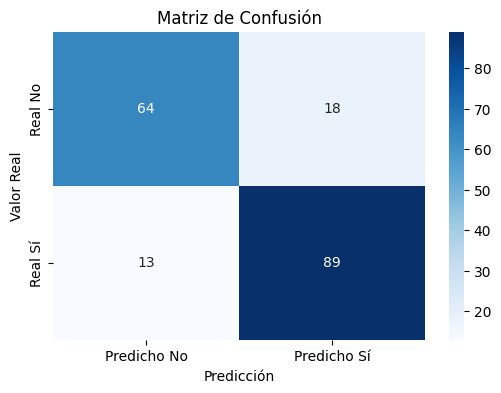

In [98]:
from sklearn.linear_model import LogisticRegression
log_reg_sklearn = LogisticRegression(random_state=42, max_iter=1000)
log_reg_sklearn.fit(X_train_scaled.drop('const', axis=1), y_train) # Excluir constante para sklearn
y_pred_test = log_reg_sklearn.predict(X_test_scaled.drop('const', axis=1))
y_pred_proba_test = log_reg_sklearn.predict_proba(X_test_scaled.drop('const', axis=1))[:, 1]

# Usando las predicciones del modelo sklearn en el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\n--- Matriz de Confusión ---")
print(conf_matrix)

# Para visualizarla mejor (opcional)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicho No', 'Predicho Sí'],
            yticklabels=['Real No', 'Real Sí'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

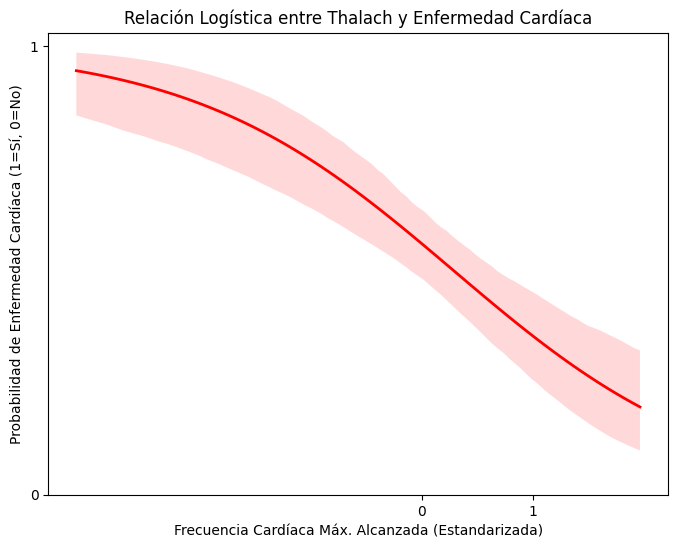

In [100]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# --- Graficar Logística y Dispersión ---
plt.figure(figsize=(8, 6))

# Graficar puntos reales (con jitter para visualización)
# Assign 'y_test' (the target variable 0 or 1) to the 'hue' parameter
# Set legend=False as we likely don't need a separate legend for 0 and 1 here
sns.stripplot(x=X_test_scaled_df['thalch'], y=y_test, hue=y_test, order=[0, 1], 
              jitter=0.1, alpha=0.5, palette='viridis', legend=False) # Assign y_test to hue and turn off legend

# Graficar la curva logística estimada (aproximada con regplot)
sns.regplot(x=X_test_scaled_df['thalch'], y=y_test, logistic=True, scatter=False, 
            color='red', line_kws={'linewidth': 2})

plt.ylabel('Probabilidad de Enfermedad Cardíaca (1=Sí, 0=No)')
plt.xlabel('Frecuencia Cardíaca Máx. Alcanzada (Estandarizada)')
plt.title('Relación Logística entre Thalach y Enfermedad Cardíaca')
plt.yticks([0, 1])
plt.show()